In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

## Example.1 Sin function

In [4]:
# dataset for sin function
X_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_train = np.sin(X_train)

In [5]:
X_train[:10], y_train[:10]

(array([-6.28318531, -6.27060636, -6.25802741, -6.24544846, -6.23286951,
        -6.22029056, -6.20771161, -6.19513266, -6.18255371, -6.16997476]),
 array([2.44929360e-16, 1.25786178e-02, 2.51552454e-02, 3.77278927e-02,
        5.02945704e-02, 6.28532900e-02, 7.54020646e-02, 8.79389084e-02,
        1.00461838e-01, 1.12968871e-01]))

In [6]:
# data preprocessing (reshape)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train[:10], y_train[:10]

(array([[-6.28318531],
        [-6.27060636],
        [-6.25802741],
        [-6.24544846],
        [-6.23286951],
        [-6.22029056],
        [-6.20771161],
        [-6.19513266],
        [-6.18255371],
        [-6.16997476]]),
 array([[2.44929360e-16],
        [1.25786178e-02],
        [2.51552454e-02],
        [3.77278927e-02],
        [5.02945704e-02],
        [6.28532900e-02],
        [7.54020646e-02],
        [8.79389084e-02],
        [1.00461838e-01],
        [1.12968871e-01]]))

In [8]:
# test data -> 원 함수를 잘 복원해 내는가?
X_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.sin(X_test)

# data prerocessing (reshape)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_test[:10], y_test[:10]

(array([[-6.28318531],
        [-6.15625227],
        [-6.02931923],
        [-5.9023862 ],
        [-5.77545316],
        [-5.64852012],
        [-5.52158709],
        [-5.39465405],
        [-5.26772102],
        [-5.14078798]]),
 array([[2.44929360e-16],
        [1.26592454e-01],
        [2.51147987e-01],
        [3.71662456e-01],
        [4.86196736e-01],
        [5.92907929e-01],
        [6.90079011e-01],
        [7.76146464e-01],
        [8.49725430e-01],
        [9.09631995e-01]]))

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


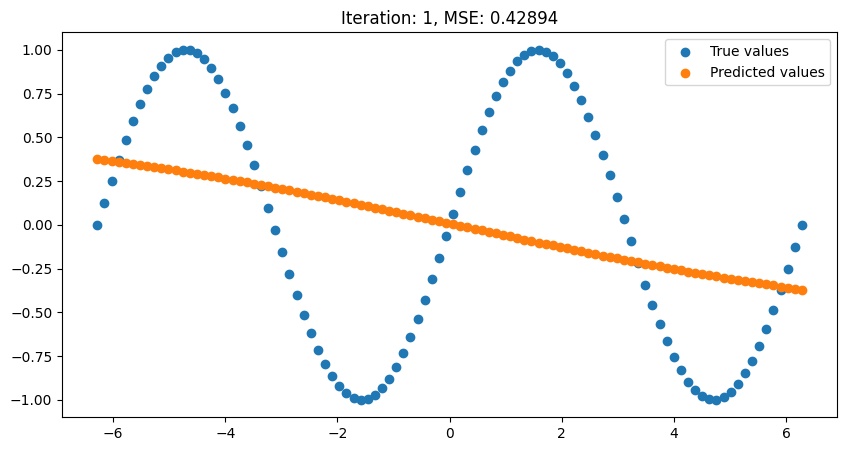

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


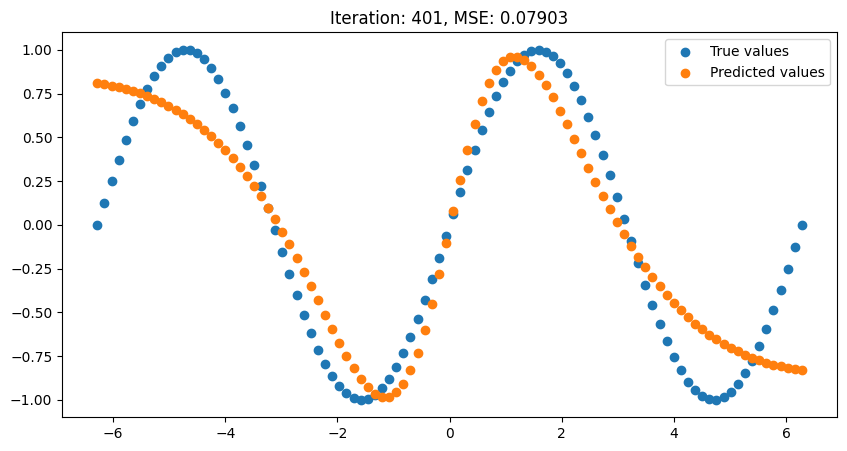

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


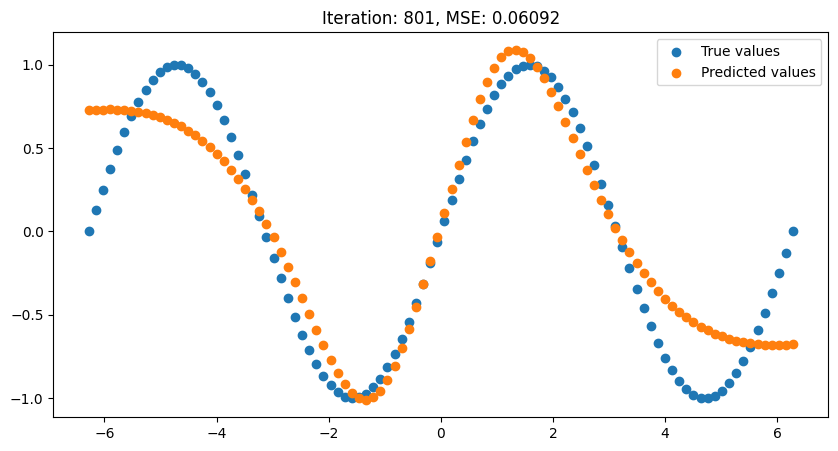

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


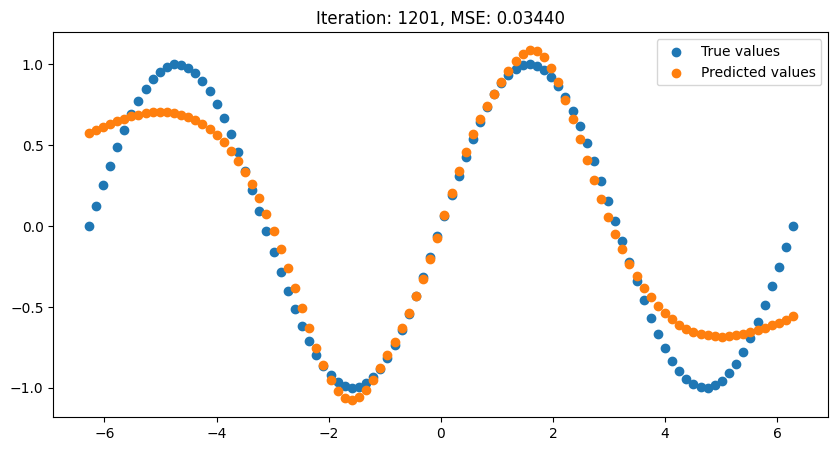

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


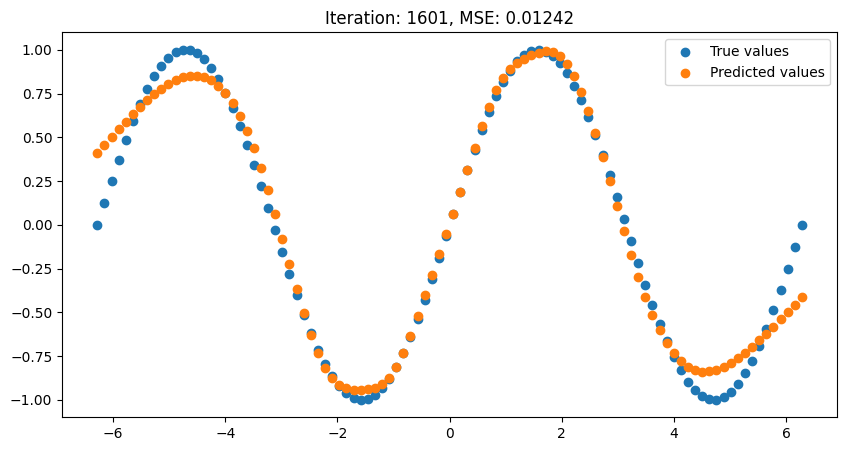

In [10]:
# init model -> one hidden layer
model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model and visualize the prediction
for i in range(2000):
    model.fit(X_train, y_train, epochs=1, verbose=0)
    if i % 400 == 0:
        y_pred = model.predict(X_test)
        plt.figure(figsize=(10, 5))
        plt.scatter(X_test, y_test, label='True values')
        plt.scatter(X_test, y_pred, label='Predicted values')
        mse = mean_squared_error(y_test, y_pred)
        plt.title(f'Iteration: {i+1}, MSE: {mse:.5f}')
        plt.legend()
        plt.show()

In [13]:
trainable_parameters = model.trainable_variables

# print parameters
for parameter in trainable_parameters:
    print(parameter.numpy())
    print(parameter.name, parameter.shape)

[[-1.4601783   1.3171912  -2.2640986  -1.3940834   1.4716464  -1.668031
   1.5482669   2.7603555   1.4114507  -1.1467904   1.2839305   2.405408
  -0.25177306 -0.25189027 -1.3251859   1.2885201  -1.1464916   1.2921413
   1.2683059  -1.4645888   1.3769062  -1.2915119  -0.2541871  -2.850178
  -1.1480668   1.3523515  -0.25175056 -1.1541922  -0.25238174 -1.145471
   1.3824407  -1.1429808   0.2525234   2.11087    -1.1844845  -1.1994399
  -1.6761179  -1.1878177  -1.1442312   1.2680846   1.4995372  -1.1678119
   1.3708756   1.289717    2.8852546   0.25300968 -1.2371801   1.4268678
   1.360567   -1.313283  ]]
kernel (1, 50)
[-3.8471756  -1.6188079  -4.6810303  -3.0799022  -3.1909316  -5.550343
 -4.3679113   0.43613094 -2.3559813  -0.77118474 -1.3542525  -3.8597257
 -0.12979801 -0.14196324 -2.5134215  -1.3914449  -0.76286685 -1.4212236
 -1.2239243  -3.902125   -2.0763767  -2.2606883  -0.26683486 -2.7268627
 -0.80479264 -1.8879378  -0.12728329 -0.93353647 -0.18003437 -0.7327679
 -2.1182525  -0.63